In [53]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
json_array = []

# Open the file and read it line by line
with open('yelp_academic_dataset_business.json', 'r') as file:
    for line in file:
        # Parse each line as a JSON object and append to the list
        json_obj = json.loads(line.strip())  # strip() removes any leading/trailing whitespace
        json_array.append(json_obj)

In [3]:
json_array[0]

{'business_id': 'Pns2l4eNsfO8kk83dixA6A',
 'name': 'Abby Rappoport, LAC, CMQ',
 'address': '1616 Chapala St, Ste 2',
 'city': 'Santa Barbara',
 'state': 'CA',
 'postal_code': '93101',
 'latitude': 34.4266787,
 'longitude': -119.7111968,
 'stars': 5.0,
 'review_count': 7,
 'is_open': 0,
 'attributes': {'ByAppointmentOnly': 'True'},
 'categories': 'Doctors, Traditional Chinese Medicine, Naturopathic/Holistic, Acupuncture, Health & Medical, Nutritionists',
 'hours': None}

In [4]:
city_biz_counts = {}

for obj in json_array:
    city = obj['city']
    if city in city_biz_counts:
        city_biz_counts[city] += 1
    else:
        city_biz_counts[city] = 1
print(city_biz_counts)


city_biz_counts = sorted(city_biz_counts.items(), key=lambda x: x[1], reverse=True)
print(city_biz_counts)

{'Santa Barbara': 3829, 'Affton': 36, 'Tucson': 9250, 'Philadelphia': 14569, 'Green Lane': 10, 'Ashland City': 41, 'Brentwood': 767, 'St. Petersburg': 1185, 'Nashville': 6971, "Land O' Lakes": 97, 'Tampa Bay': 141, 'Indianapolis': 7540, 'Clearwater': 2221, 'Largo': 1002, 'New Orleans': 6209, 'Kenner': 584, 'Edmonton': 5054, 'Reno': 5935, 'Newtown': 322, 'White House': 74, 'Boise': 2937, 'Paoli': 152, 'Ardmore': 376, 'Exton': 419, 'Wilmington': 1446, 'Edwardsville': 274, 'Sparks': 1624, 'Alton': 150, 'Cherry Hill': 960, 'Bala Cynwyd': 202, 'Springfield': 384, 'Belleville': 302, 'Carmel': 967, 'Tampa': 9050, 'Kennett Square': 175, 'Plymouth Meeting': 199, 'Harvey': 289, 'West Chester': 838, 'Meridian': 1043, 'Hudson': 228, 'Fernley': 1, 'Williamstown': 112, 'Pinellas Park': 512, 'Glenolden': 64, 'Wesley Chapel': 560, 'Fishers': 570, 'Burlington': 177, 'Troy': 50, 'Camden': 108, 'Plainfield': 271, 'Bensalem': 454, 'Maplewood': 134, 'Saint Louis': 4827, 'Fairview Heights': 241, 'Oro Valley

In [5]:
Phil_only = [obj for obj in json_array if obj['city'] == 'Philadelphia']
len(Phil_only)

14569

In [6]:
Phil_cat_count = {}

for obj in Phil_only:
    cat = obj['categories']
    if cat in Phil_cat_count:
        Phil_cat_count[cat] += 1
    else:
        Phil_cat_count[cat] = 1

Phil_cat = sorted(Phil_cat_count.items(), key=lambda x: x[1], reverse=True)
Phil_cat

[('Restaurants, Pizza', 154),
 ('Pizza, Restaurants', 124),
 ('Restaurants, Chinese', 89),
 ('Nail Salons, Beauty & Spas', 86),
 ('Chinese, Restaurants', 84),
 ('Beauty & Spas, Hair Salons', 80),
 ('Beauty & Spas, Nail Salons', 79),
 ('Hair Salons, Beauty & Spas', 79),
 ('Food, Coffee & Tea', 50),
 ('Coffee & Tea, Food', 50),
 ('Restaurants, Italian', 43),
 ('Restaurants, Mexican', 42),
 ('Mexican, Restaurants', 39),
 ('Italian, Restaurants', 39),
 ('Food, Grocery', 37),
 ('Restaurants, American (New)', 36),
 ('American (New), Restaurants', 34),
 ('Auto Repair, Automotive', 33),
 ('Food, Beer, Wine & Spirits', 33),
 ('Automotive, Auto Repair', 31),
 ('Banks & Credit Unions, Financial Services', 30),
 ('Barbers, Beauty & Spas', 28),
 ('Grocery, Food', 28),
 ('Beer, Wine & Spirits, Food', 27),
 ('Parking, Automotive', 25),
 ('Automotive, Parking', 25),
 ('Restaurants, Vietnamese', 24),
 ('Restaurants', 23),
 ('Breakfast & Brunch, Restaurants', 22),
 ('Food, Ice Cream & Frozen Yogurt', 22

In [10]:
Phil_muesum = []
for obj in Phil_only:
    if(obj['categories']):
        if 'Museum' in obj['categories']:
            Phil_muesum.append(obj)
Phil_muesum = sorted(Phil_muesum, key=lambda x: x['stars'], reverse=True)
df_Phil_muesum = pd.DataFrame(Phil_muesum)
df_Phil_muesum.to_csv('Phil_muesum.csv', index=False)

In [67]:
Phil_restaurant = []
for obj in Phil_only:
    if(obj['categories']):
        if ('Restaurants' in obj['categories'].strip()) or (' Restaurants' in obj['categories'].strip()):
            Phil_restaurant.append(obj)
Phil_restaurant = sorted(Phil_restaurant, key=lambda x: x['stars'], reverse=True)
df_Phil_restaurant = pd.DataFrame(Phil_restaurant)
df_Phil_restaurant.to_csv('Phil_restaurant.csv', index=False)

In [12]:
Counter = 0
for obj in Phil_only:
    if(obj['categories']):
        if 'Restaurants' in obj['categories'].strip():
            Counter += 1
Counter

5852

In [13]:
Phil_food = []
for obj in Phil_only:
    if(obj['categories']):
        if 'Food' in obj['categories'].strip():
            Phil_food.append(obj)
Phil_food = sorted(Phil_food, key=lambda x: x['stars'], reverse=True)
df_Phil_food = pd.DataFrame(Phil_food)
df_Phil_food.to_csv('Phil_food.csv', index=False)

In [68]:
Phil_restaurant_food = []
for obj in Phil_only:
    if(obj['categories']):
        if ('Food' in obj['categories'].strip()) or (' Food' in obj['categories'].strip())or ('Restaurants' in obj['categories'].strip()) or (' Restaurants' in obj['categories'].strip()):
            Phil_restaurant_food.append(obj)
Phil_restaurant_food = sorted(Phil_restaurant_food, key=lambda x: x['stars'], reverse=True)
df_Phil_restaurant_food = pd.DataFrame(Phil_restaurant_food)
df_Phil_restaurant_food.to_csv('Phil_restaurant_food.csv', index=False)

In [15]:
df_Phil_restaurant_food = pd.read_csv('Phil_restaurant_food.csv')
df_Phil_restaurant_food['review_count'].describe()

count    7076.000000
mean      101.132419
std       224.279623
min         5.000000
25%        12.000000
50%        32.000000
75%        95.000000
max      5721.000000
Name: review_count, dtype: float64

In [16]:
count = df_Phil_restaurant_food[df_Phil_restaurant_food['review_count'] > 100].shape[0]
print(count)

1702


In [17]:
border = 200
count = df_Phil_restaurant_food[df_Phil_restaurant_food['review_count'] > border].shape[0]
count_ = df_Phil_restaurant_food[df_Phil_restaurant_food['review_count'] <= border].shape[0]
print(1- count/count_)

0.851112193537912


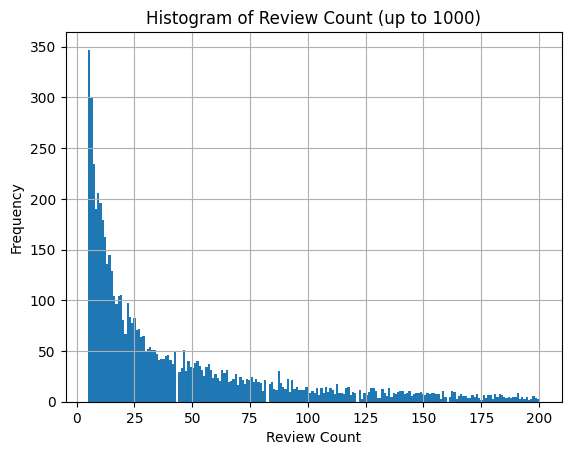

In [23]:
df_Phil_restaurant_food[df_Phil_restaurant_food['review_count']<=200]['review_count'].hist(bins=200)
plt.xlabel('Review Count')
plt.ylabel('Frequency')
plt.title('Histogram of Review Count (up to 1000)')
plt.show()

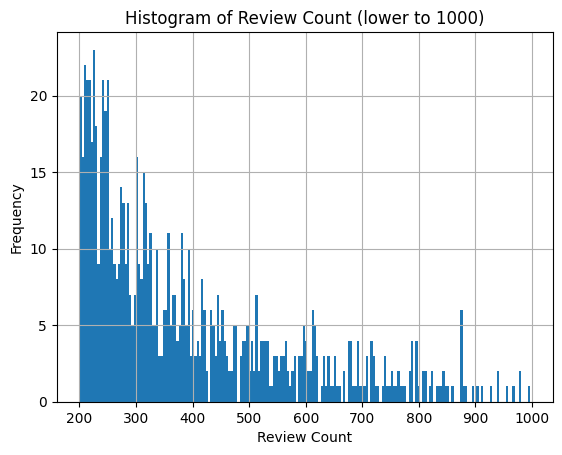

In [24]:
df_Phil_restaurant_food[(df_Phil_restaurant_food['review_count']>=200) & (df_Phil_restaurant_food['review_count']<=1000)]['review_count'].hist(bins=200)
plt.xlabel('Review Count')
plt.ylabel('Frequency')
plt.title('Histogram of Review Count (lower to 1000)')
plt.show()

In [3]:
df_Phil_restaurant_food = pd.read_csv('Phil_restaurant_food.csv')

In [4]:
df_Phil_restaurant_food.loc[df_Phil_restaurant_food['name'] =='El Vez']

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
3150,9PZxjhTIU7OgPIzuGi89Ew,El Vez,121 S 13th St,Philadelphia,PA,19107.0,39.949702,-75.16177,4.0,3187,1,"{'RestaurantsReservations': 'True', 'BYOBCorka...","Lounges, Bars, Nightlife, Breakfast & Brunch, ...","{'Monday': '0:0-0:0', 'Tuesday': '12:0-22:0', ..."


In [11]:
Phil_park = []
for obj in Phil_only:
    if(obj['categories']):
        if ('Park' in obj['categories'].strip()):
            Phil_park.append(obj)
Phil_park = sorted(Phil_park, key=lambda x: x['stars'], reverse=True)
len(Phil_park)

162

In [12]:
Phil_park[0]

{'business_id': '5nCptLGKDMqCYT52nqzpvQ',
 'name': "Bob's Bait & Tackle",
 'address': '4863 Ridge Ave',
 'city': 'Philadelphia',
 'state': 'PA',
 'postal_code': '19129',
 'latitude': 40.0144308,
 'longitude': -75.2044773,
 'stars': 5.0,
 'review_count': 10,
 'is_open': 0,
 'attributes': {'GoodForKids': 'True',
  'WheelchairAccessible': 'False',
  'BusinessAcceptsCreditCards': 'True',
  'BikeParking': 'False'},
 'categories': 'Boating, Active Life, Fishing, Amusement Parks, Shopping, Hunting & Fishing Supplies, Sporting Goods',
 'hours': {'Monday': '9:0-18:0',
  'Tuesday': '9:0-18:0',
  'Wednesday': '9:0-18:0',
  'Thursday': '9:0-18:0',
  'Friday': '9:0-18:0',
  'Saturday': '7:0-17:0',
  'Sunday': '9:0-16:0'}}

In [20]:
all_cat = set()
for obj in Phil_only:
    if(obj['categories']):
        cat = obj['categories'].strip().split(',')
        cat_set = set(cat)
        #print(cat_set)
        all_cat = all_cat.union(cat_set)

len(all_cat)

1730

In [19]:
with open("all-categories.txt", "w") as f:
    for element in all_cat:
        f.write(str(element) + "\n")

In [47]:
json_array = []

# Open the file and read it line by line
with open('yelp_academic_dataset_review.json', 'r') as file:
    for line in file:
        # Parse each line as a JSON object and append to the list
        json_obj = json.loads(line.strip())  # strip() removes any leading/trailing whitespace
        json_array.append(json_obj)

In [22]:
json_array[0]

{'review_id': 'KU_O5udG6zpxOg-VcAEodg',
 'user_id': 'mh_-eMZ6K5RLWhZyISBhwA',
 'business_id': 'XQfwVwDr-v0ZS3_CbbE5Xw',
 'stars': 3.0,
 'useful': 0,
 'funny': 0,
 'cool': 0,
 'text': "If you decide to eat here, just be aware it is going to take about 2 hours from beginning to end. We have tried it multiple times, because I want to like it! I have been to it's other locations in NJ and never had a bad experience. \n\nThe food is good, but it takes a very long time to come out. The waitstaff is very young, but usually pleasant. We have just had too many experiences where we spent way too long waiting. We usually opt for another diner or restaurant on the weekends, in order to be done quicker.",
 'date': '2018-07-07 22:09:11'}

In [25]:
#9PZxjhTIU7OgPIzuGi89Ew #El Vez should have 3187 review #Find the real review number
counter = 0
for obj in json_array:
    if(obj['business_id'] == '9PZxjhTIU7OgPIzuGi89Ew'):
        counter = counter + 1
print(counter)

3264


In [47]:
#get random 20 restaurants and find the gap between real review counts and stated review counts

random_20_res = df_Phil_restaurant_food.sample(20)
df = random_20_res[['name', 'business_id', 'review_count']]
df['actual_review_count'] = [sum(1 for d in json_array if d['business_id'] == biz_id) for biz_id in df['business_id']]
df

C:\Users\Ethan\AppData\Local\Temp\ipykernel_16900\2525604262.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['actual_review_count'] = [sum(1 for d in json_array if d['business_id'] == biz_id) for biz_id in df['business_id']]


,name,business_id,review_count,actual_review_count
6577,A & J Seafood,eMlGIvwFBAaSGSp0c0Wnqw,13,13
3053,Ashburner Inn,y3LlrItb8nrzMYYiqQee3g,79,88
5328,Target,Kq2b7UTDJnk_luBRwa5LiA,19,19
3698,Iron Hill Brewery & Restaurant,ohWH383r60AREWh-aphpSw,384,403
3973,Pyramid Club,XPiujqYlO9ldyt_hjDjYPw,57,57
4534,ShopRite of Bridge & Harbison,_q-ndCLtdC2BjSfO3238PQ,7,8
408,Wired Beans Cafe,AQfAhiVYzRDH9h0t1TiIIA,5,5
1805,J&J Super Market,lsM6KeDyLJqi5X1_sx2Biw,8,8
2328,Maxwells Carribean American Take Outs,E3kCuQvpxM6O23_cjuSlmQ,16,17
6479,New Ocean Chinese Restaurant,4owrIR0t7W5WR1a8-VsoKQ,7,7


In [3]:
json_array[0]

{'business_id': 'Pns2l4eNsfO8kk83dixA6A',
 'name': 'Abby Rappoport, LAC, CMQ',
 'address': '1616 Chapala St, Ste 2',
 'city': 'Santa Barbara',
 'state': 'CA',
 'postal_code': '93101',
 'latitude': 34.4266787,
 'longitude': -119.7111968,
 'stars': 5.0,
 'review_count': 7,
 'is_open': 0,
 'attributes': {'ByAppointmentOnly': 'True'},
 'categories': 'Doctors, Traditional Chinese Medicine, Naturopathic/Holistic, Acupuncture, Health & Medical, Nutritionists',
 'hours': None}

In [43]:
Phil_hotel = []
for obj in Phil_only:
    if(obj['categories']):
        for i in obj['categories'].strip().split(','):
            if i == ' Hotels' or i == 'Hotels':
                Phil_hotel.append(obj)

df_phil_hotel = pd.DataFrame(Phil_hotel)
df_phil_hotel.to_csv('Phil_hotel.csv', index=False)
df_phil_hotel

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,6I_DA3uqOox50rBvjrQ_-g,Aloft Philadelphia Airport,4301 Island Ave,Philadelphia,PA,19153,39.891125,-75.234251,3.0,175,1,"{'WiFi': 'u'free'', 'RestaurantsPriceRange2': ...","Event Planning & Services, Hotels & Travel, Ho...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
1,FppJo5aymUsfOg68uTOipw,The Inn at The Union League,1450 Sansom,Philadelphia,PA,19103,39.950233,-75.165187,3.5,19,1,"{'RestaurantsPriceRange2': '3', 'WiFi': 'u'fre...","Hotels & Travel, Event Planning & Services, Ho...",None
2,qluIWCzDpeZfddykm_2gYg,North American Motor Inns,4444 City Ave,Philadelphia,PA,19131,40.003137,-75.221333,1.0,25,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Hotels, Event Planning & Services, Hotels & Tr...",None
3,AAFofLiyt_K1Ar_eEuVc7g,Crowne Plaza Hotel Philadelphia Downtown,1800 Market St,Philadelphia,PA,19103,39.952834,-75.170345,3.0,59,0,"{'RestaurantsPriceRange2': '2', 'BusinessAccep...","Venues & Event Spaces, Hotels, Event Planning ...",None
4,2oav5QoWgnvTI2gO5xFMjw,Kimpton Hotel Monaco Philadelphia,433 Chestnut St,Philadelphia,PA,19106,39.949124,-75.148895,4.0,499,1,"{'RestaurantsPriceRange2': '3', 'WiFi': 'u'fre...","Hotels & Travel, Event Planning & Services, Ve...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,d9T1Jgf4N2vY3dcMlnCgeA,Philadelphia Airport Marriott,"One Arrivals Road, Terminal B",Philadelphia,PA,19153,39.877788,-75.244411,3.0,176,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Hotels, Hotels & Travel, Event Planning & Serv...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
126,4hM6GbEq5Jt-YZ0vRN1-Lw,The Gables,4520 Chester Ave,Philadelphia,PA,19143,39.946893,-75.212147,5.0,41,1,"{'RestaurantsPriceRange2': '3', 'WiFi': 'u'fre...","Hotels & Travel, Bed & Breakfast, Hotels, Even...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
127,0FMOvA2Noq-gieWfnXB7aQ,Live! Casino & Hotel Philadelphia,900 Packer Ave,Philadelphia,PA,19148,39.909191,-75.164662,2.5,26,1,None,"Event Planning & Services, Arts & Entertainmen...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
128,p6H295aQCbDJ80GcpqFvwA,Club Quarters Philadelphia,1628 Chestnut St,Philadelphia,PA,19103,39.951294,-75.168440,3.0,402,1,"{'RestaurantsPriceRange2': '2', 'BusinessAccep...","Hotels, Event Planning & Services, Hotels & Tr...",None


In [48]:
# this does not give what we want
df_phil_hotel['actual_review_count'] = [sum(1 for d in json_array if d['business_id'] == biz_id) for biz_id in df_phil_hotel['business_id']]
df_phil_hotel

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,actual_review_count
0,6I_DA3uqOox50rBvjrQ_-g,Aloft Philadelphia Airport,4301 Island Ave,Philadelphia,PA,19153,39.891125,-75.234251,3.0,175,1,"{'WiFi': 'u'free'', 'RestaurantsPriceRange2': ...","Event Planning & Services, Hotels & Travel, Ho...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",175
1,FppJo5aymUsfOg68uTOipw,The Inn at The Union League,1450 Sansom,Philadelphia,PA,19103,39.950233,-75.165187,3.5,19,1,"{'RestaurantsPriceRange2': '3', 'WiFi': 'u'fre...","Hotels & Travel, Event Planning & Services, Ho...",None,19
2,qluIWCzDpeZfddykm_2gYg,North American Motor Inns,4444 City Ave,Philadelphia,PA,19131,40.003137,-75.221333,1.0,25,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Hotels, Event Planning & Services, Hotels & Tr...",None,26
3,AAFofLiyt_K1Ar_eEuVc7g,Crowne Plaza Hotel Philadelphia Downtown,1800 Market St,Philadelphia,PA,19103,39.952834,-75.170345,3.0,59,0,"{'RestaurantsPriceRange2': '2', 'BusinessAccep...","Venues & Event Spaces, Hotels, Event Planning ...",None,61
4,2oav5QoWgnvTI2gO5xFMjw,Kimpton Hotel Monaco Philadelphia,433 Chestnut St,Philadelphia,PA,19106,39.949124,-75.148895,4.0,499,1,"{'RestaurantsPriceRange2': '3', 'WiFi': 'u'fre...","Hotels & Travel, Event Planning & Services, Ve...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,d9T1Jgf4N2vY3dcMlnCgeA,Philadelphia Airport Marriott,"One Arrivals Road, Terminal B",Philadelphia,PA,19153,39.877788,-75.244411,3.0,176,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Hotels, Hotels & Travel, Event Planning & Serv...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",179
126,4hM6GbEq5Jt-YZ0vRN1-Lw,The Gables,4520 Chester Ave,Philadelphia,PA,19143,39.946893,-75.212147,5.0,41,1,"{'RestaurantsPriceRange2': '3', 'WiFi': 'u'fre...","Hotels & Travel, Bed & Breakfast, Hotels, Even...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",41
127,0FMOvA2Noq-gieWfnXB7aQ,Live! Casino & Hotel Philadelphia,900 Packer Ave,Philadelphia,PA,19148,39.909191,-75.164662,2.5,26,1,None,"Event Planning & Services, Arts & Entertainmen...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",27
128,p6H295aQCbDJ80GcpqFvwA,Club Quarters Philadelphia,1628 Chestnut St,Philadelphia,PA,19103,39.951294,-75.168440,3.0,402,1,"{'RestaurantsPriceRange2': '2', 'BusinessAccep...","Hotels, Event Planning & Services, Hotels & Tr...",None,406


In [56]:
df_phil_hotel['actual_review_count'].describe()

count    130.000000
mean     110.600000
std      124.906514
min        5.000000
25%       28.250000
50%       58.000000
75%      147.750000
max      609.000000
Name: actual_review_count, dtype: float64

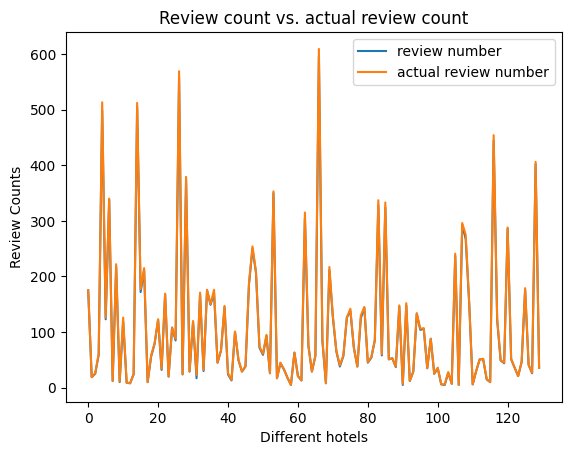

In [52]:
# Create the figure and axis
fig, ax = plt.subplots()

# Plot the two lines
ax.plot(df_phil_hotel['review_count'], label='review number')
ax.plot(df_phil_hotel['actual_review_count'], label='actual review number')

# Set the title and labels
ax.set_title('Review count vs. actual review count')
ax.set_xlabel('Different hotels')
ax.set_ylabel('Review Counts')

# Add a legend
ax.legend()

# Show the plot
plt.show()

C:\Users\Ethan\AppData\Local\Temp\ipykernel_21588\4289951478.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_phil_hotel['actual_review_count'], shade=True)


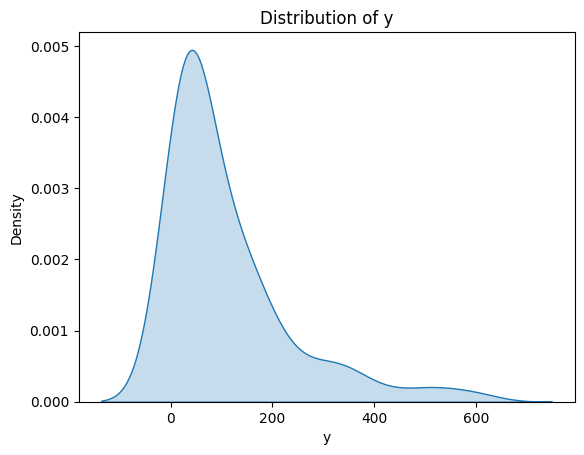

In [54]:
# Create a density plot of y
sns.kdeplot(df_phil_hotel['actual_review_count'], shade=True)

# Set the title and labels
plt.title('Distribution of y')
plt.xlabel('y')
plt.ylabel('Density')

# Show the plot
plt.show()

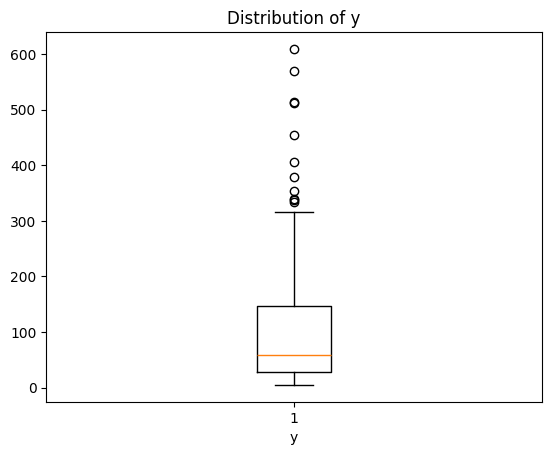

In [55]:
plt.boxplot(df_phil_hotel['actual_review_count'])

# Set the title and labels
plt.title('Distribution of y')
plt.xlabel('y')

# Show the plot
plt.show()

In [62]:
cat_set = set()
for obj in json_array:
    if(obj['categories']):
        cat_arr = obj['categories'].strip().split(',')
        for cat in cat_arr:
            cat_set.add(cat)

cat_set_single = cat_set
with open('cat_set_single.txt', 'w') as f:
    # Write the set to the file
    for item in cat_set_single:
        f.write(str(item) + '\n')

In [66]:
cat_set = []
for obj in json_array:
    if(obj['categories']):
        cat_arr = obj['categories'].strip().split(',')
        cat_set.append(cat_arr)
df = pd.DataFrame(cat_set)
df.to_csv('cat_set.csv', index=False)

In [77]:
Phil_local_flavor = []
for obj in Phil_only:
    if(obj['categories']):
        if ('Local Flavor' in obj['categories'].strip().split(',')) or (' Local Flavor' in obj['categories'].strip().split(',')):
            Phil_local_flavor.append(obj)
Phil_local_flavor = sorted(Phil_local_flavor, key=lambda x: x['stars'], reverse=True)
df_Phil_local_flavor = pd.DataFrame(Phil_local_flavor)
df_Phil_local_flavor.to_csv('Phil_local_flavor.csv', index=False)

In [ ]:
Phil_hotel = []
for obj in Phil_only:
    if(obj['categories']):
        for i in obj['categories'].strip().split(','):
            if i == ' Hotels' or i == 'Hotels':
                Phil_hotel.append(obj)

df_phil_hotel = pd.DataFrame(Phil_hotel)
df_phil_hotel.to_csv('Phil_hotel.csv', index=False)
df_phil_hotel